In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on NA2
use_NA2 = []
for k in range (len(data)):
    if data['home_team'][k] == 'NA2' and data['away_team'][k] not in ['NA1', 'NA2']:
        use_NA2.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'NA2' and data['home_team'][g] not in ['NA1', 'NA2']:
        use_NA2.append(g)
data_na2 = data.filter(items = use_NA2, axis = 0)
data_na2 = data_na2.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_na2 = data_na2.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
data_na2 = data_na2.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_na2 = data_na2.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_na2)

            date      home_team      away_team  year  home  away  goal_margin
1176  1952-03-23            NA2  South_America  1952    -1     1            6
1183  1952-04-06            NA2  South_America  1952    -1     1            5
1664  1961-03-19            NA2  South_America  1961     0     0            0
2188  1969-05-14            NA2  South_America  1969    -1     1            3
2382  1972-02-09            NA2  South_America  1972     1    -1            1
...          ...            ...            ...   ...   ...   ...          ...
8582  2019-10-15  South_America            NA2  2019     1    -1            2
8654  2020-11-13           Asia            NA2  2020     1    -1            1
8748  2021-07-04           Asia            NA2  2021     1    -1            1
8754  2021-07-13           Asia            NA2  2021     0     0            0
8762  2021-07-24           Asia            NA2  2021     1    -1            1

[187 rows x 7 columns]


In [4]:
na = []
opponent = []
match_status = []
for x in range (len(data_na2)):
    na.append('NA2')
    if np.array(data_na2['home_team'])[x] == 'NA2':
        opponent.append(np.array(data_na2['away_team'])[x])
        match_status.append(np.array(data_na2['home'])[x])
    else:
        opponent.append(np.array(data_na2['home_team'])[x])
        match_status.append(np.array(data_na2['away'])[x])
        
na2 = pd.DataFrame(data = {'north_america_tier2' : na, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_na2['goal_margin']), 'year' : np.array(data_na2['year'])})

print(na2)

    north_america_tier2       opponent  match_status  goal_margin  year
0                   NA2  South_America            -1            6  1952
1                   NA2  South_America            -1            5  1952
2                   NA2  South_America             0            0  1961
3                   NA2  South_America            -1            3  1969
4                   NA2  South_America             1            1  1972
..                  ...            ...           ...          ...   ...
182                 NA2  South_America            -1            2  2019
183                 NA2           Asia            -1            1  2020
184                 NA2           Asia            -1            1  2021
185                 NA2           Asia             0            0  2021
186                 NA2           Asia            -1            1  2021

[187 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
na2_asia = []
na2_europe =[]
na2_south_america =[]
na2_africa = []

for y in range (len(na2)):
    if opponent[y] == 'Asia':
        na2_asia.append(y)
    elif opponent[y] == 'South_America':
        na2_south_america.append(y)
    elif opponent[y] == 'Europe':
        na2_europe.append(y)
    if opponent[y] == 'Africa':
        na2_africa.append(y)
#verifying
print(len(na2_africa) + len(na2_asia) + len(na2_europe) + len(na2_south_america) )

187


In [6]:
#na2_vs_asia 
na2_vs_asia = na2.filter(items = na2_asia, axis = 0)

#na2_vs_europe 
na2_vs_europe = na2.filter(items = na2_europe, axis = 0)

#na2_vs_south_america 
na2_vs_south_america = na2.filter(items = na2_south_america, axis = 0)

#na2_vs_africa 
na2_vs_africa = na2.filter(items = na2_africa, axis = 0)

na2_vs_asia.to_excel("Na_Tier2_vs_Asia.xlsx", index = False)
na2_vs_europe.to_excel("Na_Tier2_vs_Europe.xlsx", index = False)
na2_vs_south_america.to_excel("Na_Tier2_vs_South_America.xlsx", index = False)
na2_vs_africa.to_excel("Na_Tier2_vs_Africa.xlsx", index = False)

    north_america_tier2 opponent  match_status  goal_margin  year
85                  NA2     Asia             0            0  2017
87                  NA2     Asia             0            0  2018
91                  NA2     Asia            -1            2  2021
100                 NA2     Asia             1            1  1982
101                 NA2     Asia             0            0  1982
119                 NA2     Asia             0            0  2002
124                 NA2     Asia            -1            1  2004
129                 NA2     Asia            -1            1  2005
143                 NA2     Asia             1            1  2010
154                 NA2     Asia            -1            6  2014
164                 NA2     Asia             0            0  2017
165                 NA2     Asia            -1            1  2017
167                 NA2     Asia            -1            2  2017
174                 NA2     Asia            -1            3  2018
183       

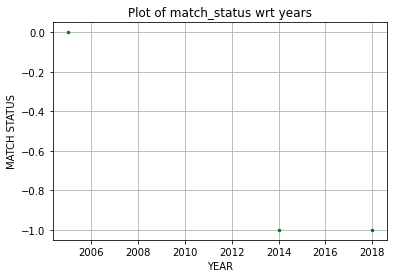

Text(0.5, 1.0, 'Histogram of match_status')

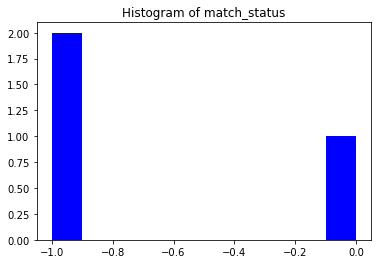

In [7]:
#checking
print(na2_vs_asia)

#plot na2_vs_africa
plt.plot(na2_vs_africa['year'], na2_vs_africa['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(na2_vs_africa['match_status'], color = 'blue')
plt.title('Histogram of match_status')